# 方差过滤

In [4]:
#1.导入所需要的库
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import numpy as np
from sklearn.preprocessing import StandardScaler

In [5]:
# 2.导入数据集，探索数据
data = pd.read_csv(r"C:\Users\ASUS\Desktop\EEG\feature_analysis\ours\S6\152_s6.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Columns: 153 entries, mean_0 to Label
dtypes: float64(153)
memory usage: 1.3 MB


In [6]:
data.shape

(1143, 153)

In [7]:
data.head()

mean_0  mean_1  mean_2   mean_3  mean_d_h2h1_0  mean_d_h2h1_1  \
0  14.800  7.3400 -0.4950  1.50000         31.100         20.600   
1  -1.050  0.0325 -0.1630  0.00905         -1.740          0.232   
2  -0.855  0.1730 -0.0269  0.15800          3.450         -5.270   
3  -0.245 -0.0659  0.0123  0.06640         -0.677          0.211   
4   0.412 -0.0998 -0.1910  0.00327          0.549          0.302   

   mean_d_h2h1_2  mean_d_h2h1_3  mean_q1_0  mean_q1_1  ...  min_d_q2q3_3  \
0         -3.560        -3.1900     -2.800    -3.2700  ...         -9.32   
1          0.122         0.1350      0.777    -0.3590  ...          6.59   
2          1.080        -0.7930     -4.620    -2.6100  ...       -646.00   
3         -0.185        -0.1440     -0.539    -0.3450  ...        -10.00   
4         -0.205         0.0893      0.259     0.0428  ...         13.20   

   min_d_q2q4_0  min_d_q2q4_1  min_d_q2q4_2  min_d_q2q4_3  min_d_q3q4_0  \
0       1270.00        1070.0        415.00        689.00       1260.00   
1          8.47           5.6          8.55         -6.17         22.40   
2       -854.00        -403.0       -265.00       -681.00        -89.70   
3          4.10           7.8          6.02          4.88          6.69   
4          8.98          12.0         -6.57         15.90        -37.90   

   min_d_q3q4_1  min_d_q3q4_2  min_d_q3q4_3  Label  
0       1080.00        401.00        699.00    2.0  
1         -1.67         -3.97        -12.80    2.0  
2       -115.00        -28.30        -35.40    2.0  
3         -2.49          2.27         14.90    0.0  
4         24.70        -14.70          2.74    0.0  

[5 rows x 153 columns]

In [8]:
data.describe()

mean_0       mean_1       mean_2       mean_3  mean_d_h2h1_0  \
count  1143.000000  1143.000000  1143.000000  1143.000000    1143.000000   
mean      0.002296    -0.002604     0.002725     0.000076      -0.207958   
std       1.962996     1.216511     0.559418     0.178293       8.653195   
min     -14.600000   -12.800000    -4.860000    -1.750000     -88.100000   
25%      -0.448000    -0.208000    -0.153000    -0.053100      -1.950000   
50%       0.016200     0.006080     0.001050     0.003180      -0.196000   
75%       0.461500     0.203000     0.150500     0.052100       1.310000   
max      14.800000     9.660000     3.010000     1.500000      41.500000   

       mean_d_h2h1_1  mean_d_h2h1_2  mean_d_h2h1_3    mean_q1_0    mean_q1_1  \
count    1143.000000    1143.000000    1143.000000  1143.000000  1143.000000   
mean        0.118906      -0.052420       0.026596    -0.238076     0.054894   
std         3.579223       2.082549       0.784738     9.546161     4.349564   
min       -31.900000     -13.300000      -4.010000   -81.900000   -29.500000   
25%        -0.620500      -0.635500      -0.210000    -2.010000    -0.822000   
50%         0.070100      -0.128000       0.008470    -0.004730    -0.040500   
75%         0.722000       0.392500       0.243500     1.870000     0.770000   
max        21.800000      13.200000       4.320000    57.800000    52.100000   

       ...  min_d_q2q3_3  min_d_q2q4_0  min_d_q2q4_1  min_d_q2q4_2  \
count  ...   1143.000000   1143.000000   1143.000000   1143.000000   
mean   ...      0.292825     -6.226208     -2.073598     -6.552725   
std    ...     73.104829    172.530050    144.896137     96.503679   
min    ...   -646.000000   -972.000000   -786.000000   -634.000000   
25%    ...    -11.700000    -21.800000    -21.550000    -19.300000   
50%    ...      1.900000     -0.668000     -1.370000     -1.580000   
75%    ...     16.000000     24.950000     16.850000     16.700000   
max    ...    335.000000   1270.000000   1310.000000    537.000000   

       min_d_q2q4_3  min_d_q3q4_0  min_d_q3q4_1  min_d_q3q4_2  min_d_q3q4_3  \
count   1143.000000   1143.000000   1143.000000   1143.000000   1143.000000   
mean      -0.024922     -3.094731      6.563929     -4.841803     -0.331207   
std      103.976095    169.575147    142.331222     78.189618     89.294030   
min     -681.000000  -1340.000000   -753.000000   -574.000000   -504.000000   
25%      -15.050000    -20.750000    -16.100000    -14.700000    -12.000000   
50%        1.410000      2.010000      1.890000     -0.597000      0.473000   
75%       17.750000     22.200000     16.300000     13.350000     12.450000   
max      976.000000   1260.000000   1370.000000    498.000000   1110.000000   

             Label  
count  1143.000000  
mean      0.902012  
std       0.810950  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max       2.000000  

[8 rows x 153 columns]

In [9]:
from sklearn.preprocessing import LabelEncoder
y = data.iloc[:,-1]#要输入的是标签，不是特征矩阵，所以允许一维

In [10]:
le = LabelEncoder()  # 实例化
le = le.fit(y) # 导入数据
label = le.transform(y) # transform接口调取数据
le.classes_  #属性.classes_查看标签中究竟有多少类别
label

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

In [11]:
le.fit_transform(y)  #也可以直接fit_transform一步到位

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

In [12]:
le.inverse_transform(label)  #使用inverse_transform可以逆转

array([2., 2., 2., ..., 0., 0., 0.])

In [13]:
data.iloc[:,-1] = label  #让标签等于我们运行出来的结果
data.head()


mean_0  mean_1  mean_2   mean_3  mean_d_h2h1_0  mean_d_h2h1_1  \
0  14.800  7.3400 -0.4950  1.50000         31.100         20.600   
1  -1.050  0.0325 -0.1630  0.00905         -1.740          0.232   
2  -0.855  0.1730 -0.0269  0.15800          3.450         -5.270   
3  -0.245 -0.0659  0.0123  0.06640         -0.677          0.211   
4   0.412 -0.0998 -0.1910  0.00327          0.549          0.302   

   mean_d_h2h1_2  mean_d_h2h1_3  mean_q1_0  mean_q1_1  ...  min_d_q2q3_3  \
0         -3.560        -3.1900     -2.800    -3.2700  ...         -9.32   
1          0.122         0.1350      0.777    -0.3590  ...          6.59   
2          1.080        -0.7930     -4.620    -2.6100  ...       -646.00   
3         -0.185        -0.1440     -0.539    -0.3450  ...        -10.00   
4         -0.205         0.0893      0.259     0.0428  ...         13.20   

   min_d_q2q4_0  min_d_q2q4_1  min_d_q2q4_2  min_d_q2q4_3  min_d_q3q4_0  \
0       1270.00        1070.0        415.00        689.00       1260.00   
1          8.47           5.6          8.55         -6.17         22.40   
2       -854.00        -403.0       -265.00       -681.00        -89.70   
3          4.10           7.8          6.02          4.88          6.69   
4          8.98          12.0         -6.57         15.90        -37.90   

   min_d_q3q4_1  min_d_q3q4_2  min_d_q3q4_3  Label  
0       1080.00        401.00        699.00      2  
1         -1.67         -3.97        -12.80      2  
2       -115.00        -28.30        -35.40      2  
3         -2.49          2.27         14.90      0  
4         24.70        -14.70          2.74      0  

[5 rows x 153 columns]

In [14]:
print(data.columns)

Index(['mean_0', 'mean_1', 'mean_2', 'mean_3', 'mean_d_h2h1_0',
       'mean_d_h2h1_1', 'mean_d_h2h1_2', 'mean_d_h2h1_3', 'mean_q1_0',
       'mean_q1_1',
       ...
       'min_d_q2q3_3', 'min_d_q2q4_0', 'min_d_q2q4_1', 'min_d_q2q4_2',
       'min_d_q2q4_3', 'min_d_q3q4_0', 'min_d_q3q4_1', 'min_d_q3q4_2',
       'min_d_q3q4_3', 'Label'],
      dtype='object', length=153)


In [15]:
data['Label']

0       2
1       2
2       2
3       0
4       0
       ..
1138    0
1139    2
1140    0
1141    0
1142    0
Name: Label, Length: 1143, dtype: int64

In [16]:
data.shape

(1143, 153)

In [17]:
x = data.iloc[:,0:152]
x.head()

mean_0  mean_1  mean_2   mean_3  mean_d_h2h1_0  mean_d_h2h1_1  \
0  14.800  7.3400 -0.4950  1.50000         31.100         20.600   
1  -1.050  0.0325 -0.1630  0.00905         -1.740          0.232   
2  -0.855  0.1730 -0.0269  0.15800          3.450         -5.270   
3  -0.245 -0.0659  0.0123  0.06640         -0.677          0.211   
4   0.412 -0.0998 -0.1910  0.00327          0.549          0.302   

   mean_d_h2h1_2  mean_d_h2h1_3  mean_q1_0  mean_q1_1  ...  min_d_q2q3_2  \
0         -3.560        -3.1900     -2.800    -3.2700  ...         13.90   
1          0.122         0.1350      0.777    -0.3590  ...         12.50   
2          1.080        -0.7930     -4.620    -2.6100  ...       -237.00   
3         -0.185        -0.1440     -0.539    -0.3450  ...          3.75   
4         -0.205         0.0893      0.259     0.0428  ...          8.10   

   min_d_q2q3_3  min_d_q2q4_0  min_d_q2q4_1  min_d_q2q4_2  min_d_q2q4_3  \
0         -9.32       1270.00        1070.0        415.00        689.00   
1          6.59          8.47           5.6          8.55         -6.17   
2       -646.00       -854.00        -403.0       -265.00       -681.00   
3        -10.00          4.10           7.8          6.02          4.88   
4         13.20          8.98          12.0         -6.57         15.90   

   min_d_q3q4_0  min_d_q3q4_1  min_d_q3q4_2  min_d_q3q4_3  
0       1260.00       1080.00        401.00        699.00  
1         22.40         -1.67         -3.97        -12.80  
2        -89.70       -115.00        -28.30        -35.40  
3          6.69         -2.49          2.27         14.90  
4        -37.90         24.70        -14.70          2.74  

[5 rows x 152 columns]

In [18]:
x.describe()

mean_0       mean_1       mean_2       mean_3  mean_d_h2h1_0  \
count  1143.000000  1143.000000  1143.000000  1143.000000    1143.000000   
mean      0.002296    -0.002604     0.002725     0.000076      -0.207958   
std       1.962996     1.216511     0.559418     0.178293       8.653195   
min     -14.600000   -12.800000    -4.860000    -1.750000     -88.100000   
25%      -0.448000    -0.208000    -0.153000    -0.053100      -1.950000   
50%       0.016200     0.006080     0.001050     0.003180      -0.196000   
75%       0.461500     0.203000     0.150500     0.052100       1.310000   
max      14.800000     9.660000     3.010000     1.500000      41.500000   

       mean_d_h2h1_1  mean_d_h2h1_2  mean_d_h2h1_3    mean_q1_0    mean_q1_1  \
count    1143.000000    1143.000000    1143.000000  1143.000000  1143.000000   
mean        0.118906      -0.052420       0.026596    -0.238076     0.054894   
std         3.579223       2.082549       0.784738     9.546161     4.349564   
min       -31.900000     -13.300000      -4.010000   -81.900000   -29.500000   
25%        -0.620500      -0.635500      -0.210000    -2.010000    -0.822000   
50%         0.070100      -0.128000       0.008470    -0.004730    -0.040500   
75%         0.722000       0.392500       0.243500     1.870000     0.770000   
max        21.800000      13.200000       4.320000    57.800000    52.100000   

       ...  min_d_q2q3_2  min_d_q2q3_3  min_d_q2q4_0  min_d_q2q4_1  \
count  ...   1143.000000   1143.000000   1143.000000   1143.000000   
mean   ...     -1.709234      0.292825     -6.226208     -2.073598   
std    ...     81.796083     73.104829    172.530050    144.896137   
min    ...   -596.000000   -646.000000   -972.000000   -786.000000   
25%    ...    -15.200000    -11.700000    -21.800000    -21.550000   
50%    ...     -0.956000      1.900000     -0.668000     -1.370000   
75%    ...     13.450000     16.000000     24.950000     16.850000   
max    ...    559.000000    335.000000   1270.000000   1310.000000   

       min_d_q2q4_2  min_d_q2q4_3  min_d_q3q4_0  min_d_q3q4_1  min_d_q3q4_2  \
count   1143.000000   1143.000000   1143.000000   1143.000000   1143.000000   
mean      -6.552725     -0.024922     -3.094731      6.563929     -4.841803   
std       96.503679    103.976095    169.575147    142.331222     78.189618   
min     -634.000000   -681.000000  -1340.000000   -753.000000   -574.000000   
25%      -19.300000    -15.050000    -20.750000    -16.100000    -14.700000   
50%       -1.580000      1.410000      2.010000      1.890000     -0.597000   
75%       16.700000     17.750000     22.200000     16.300000     13.350000   
max      537.000000    976.000000   1260.000000   1370.000000    498.000000   

       min_d_q3q4_3  
count   1143.000000  
mean      -0.331207  
std       89.294030  
min     -504.000000  
25%      -12.000000  
50%        0.473000  
75%       12.450000  
max     1110.000000  

[8 rows x 152 columns]

In [19]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2,random_state=10)
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)

(914, 152) (229, 152) (914,) (229,)


In [20]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier  # k近邻算法
from sklearn.svm import SVC, LinearSVC, NuSVC   #支持向量机分类器、线性支持向量机分类器、核支持向量分类
from sklearn.tree import DecisionTreeClassifier   # 决策树
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier   # 随机森林、极端随机森林、AdaBoost、GradientBoost
from sklearn.naive_bayes import GaussianNB    #朴素贝叶斯GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   #线性判别分析
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis   #二次判别分析
import pandas as pd
import lightgbm 
from lightgbm import LGBMClassifier
import seaborn as sns

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="rbf",probability=True),
    NuSVC(probability=True),
#     DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    LGBMClassifier(),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier(),
#     GaussianNB(),
    LinearDiscriminantAnalysis(solver='svd'),
    QuadraticDiscriminantAnalysis()]

# 结果可视化
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(Xtrain, Ytrain)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(Xtest)
    acc = accuracy_score(Ytest, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(Xtest)
    ll = log_loss(Ytest, train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

KNeighborsClassifier
****Results****
Accuracy: 79.9127%
Log Loss: 1.991502827827621
SVC
****Results****
Accuracy: 75.1092%
Log Loss: 0.5816521112489267
NuSVC
****Results****
Accuracy: 79.9127%
Log Loss: 0.5572677669983234
RandomForestClassifier
****Results****
Accuracy: 95.6332%
Log Loss: 0.21355604150355909
ExtraTreesClassifier
****Results****
Accuracy: 95.6332%
Log Loss: 0.09682460991304173
LGBMClassifier
****Results****
Accuracy: 96.5066%
Log Loss: 0.12525143018156995
LinearDiscriminantAnalysis
****Results****
Accuracy: 66.3755%
Log Loss: 1.4508089845768468
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 89.0830%
Log Loss: 3.4483985786921707


In [21]:
import os
from numpy import loadtxt
import xgboost as xgb
from numpy import sort
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import datasets
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
import warnings
from matplotlib import  pyplot
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
warnings.filterwarnings("ignore")
# 加载数据集

CV accuracy scores:[0.94565217 0.93478261 0.93478261 0.90217391 0.92307692 0.92307692
 0.97802198 0.93406593 0.9010989  0.87912088]
Accuracy for XGBoost Classifier :  0.9255852842809364
[0.00328703 0.0061072  0.00319493 0.00113259 0.00566508 0.00554858
 0.00214489 0.00468074 0.00285463 0.00392161 0.00324588 0.00305277
 0.00313598 0.00344748 0.0039728  0.00278334 0.00558257 0.00586941
 0.0054535  0.00471016 0.00392391 0.00604598 0.0049704  0.01003525
 0.00303334 0.00510004 0.00498316 0.00337801 0.00367632 0.00119306
 0.00297745 0.00315738 0.00646879 0.00305889 0.00308876 0.00428978
 0.00283502 0.00429201 0.00247664 0.00405927 0.00398328 0.00347664
 0.00344889 0.00494157 0.00438979 0.00513707 0.00226428 0.00553747
 0.10461113 0.0086154  0.04253666 0.05798304 0.00112254 0.00437349
 0.00183428 0.00274681 0.00811801 0.00453935 0.00599992 0.01526884
 0.00298772 0.00061263 0.00371218 0.00560144 0.00810953 0.00592369
 0.0062883  0.00515831 0.02616109 0.01151999 0.00404046 0.00384251
 0.0020572

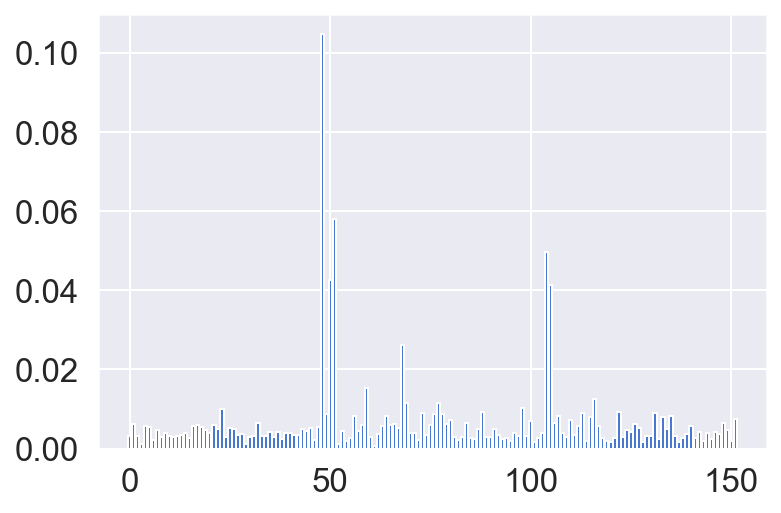

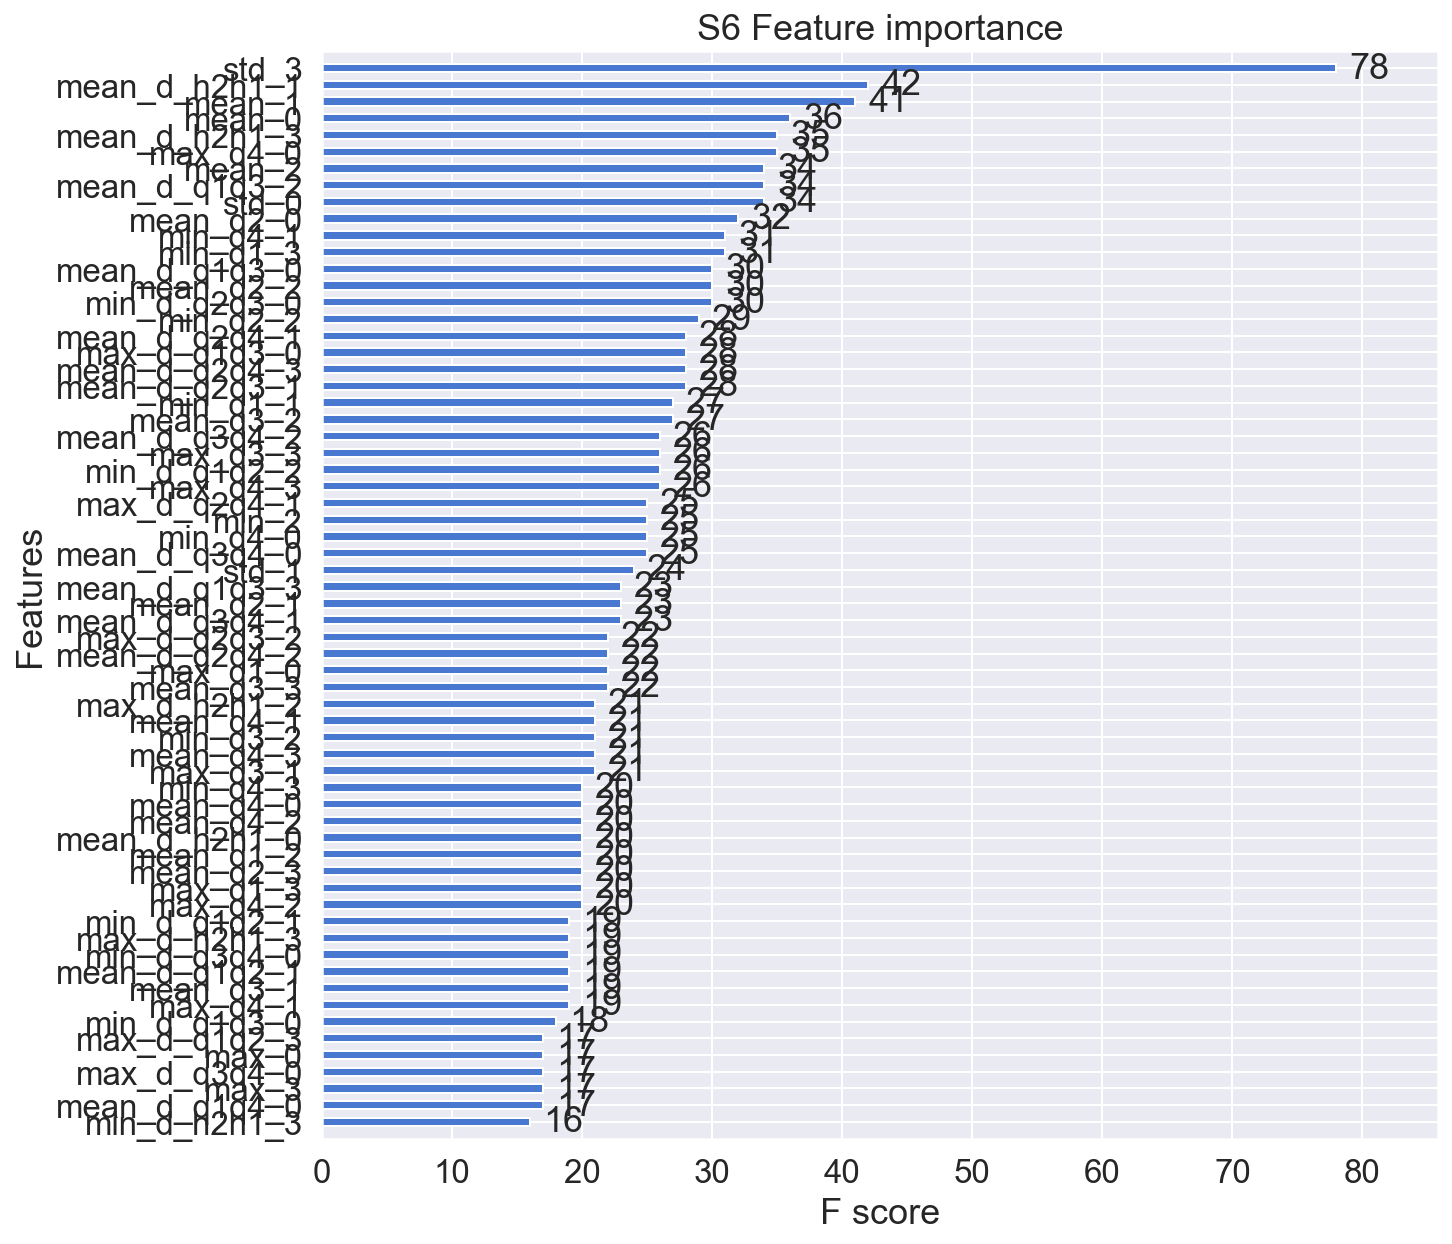

Accuracy: 94.76%
[0.00061263 0.00112254 0.00113259 0.00119306 0.0015535  0.00160521
 0.00168511 0.00174376 0.00181641 0.00182067 0.00183428 0.00187893
 0.00189771 0.00197272 0.00205724 0.00214489 0.00224571 0.00226428
 0.002327   0.00238326 0.00240315 0.00247664 0.00249191 0.0026144
 0.00261947 0.00262736 0.00263484 0.00272056 0.002743   0.00274681
 0.00276906 0.00278334 0.00283502 0.00285463 0.00290004 0.00292339
 0.00293813 0.00294362 0.00295404 0.00296316 0.00297745 0.00298772
 0.00303334 0.00305277 0.00305889 0.00308876 0.00311108 0.00311451
 0.00311633 0.00313598 0.00315738 0.00318594 0.00319493 0.00324588
 0.00324925 0.00328703 0.00337801 0.00340662 0.00344748 0.00344889
 0.00347664 0.0035252  0.00352673 0.00367632 0.00371218 0.0037263
 0.00374155 0.00384251 0.00386671 0.00389694 0.00392161 0.00392391
 0.0039728  0.00397863 0.00398328 0.00402787 0.00404046 0.00405927
 0.00413374 0.00414965 0.00428978 0.00429201 0.00430887 0.00437349
 0.00438979 0.00453935 0.00457487 0.00468074 0.

In [22]:
          #数据预处理---scale标准化

model=XGBClassifier(objective='multi:softmax',
                                                       n_estimators=150,  # 迭代次数
                                                       learning_rate=0.2,  # 步长
                                                       max_depth=3,  # 树的最大深度
                                                       min_child_weight=1,  # 决定最小叶子节点样本权重和
                                                    
                                                      subsample=0.8,  # 每个决策树所用的子样本占总样本的比例（作用于样本）
                                                       colsample_bytree=0.8, 

                                                     )

#model = XGBClassifier()
model.fit(Xtrain, Ytrain)




scores = cross_val_score(model, Xtrain, Ytrain, cv=10)
print("CV accuracy scores:%s" % scores)
print('Accuracy for XGBoost Classifier : ', scores.mean())
# 变量重要性列表
print(model.feature_importances_)

# 变量重要性可视化

plt.figure(figsize=(6,4), dpi=144)
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)


# 变量重要性排序可视化

 
fig,ax = plt.subplots(figsize=(10,10) ,dpi=144)
plot_importance(model,
                height=0.5,
                ax=ax,
                 title='S6 Feature importance',
                max_num_features=64)
plt.savefig('./output/img_S6bar.svg')
plt.show()


# make predictions for test data and evaluate
y_pred = model.predict(Xtest)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


#plot_importance(pl_xgb)
thresholds = sort(model.feature_importances_)
print(thresholds)


acc = []
for thresh in thresholds: # 遍历所有的特征重要性得分，把每个得分作为阈值进行特征选择
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_Xtrain = selection.transform(Xtrain)
# train model
    selection_model = XGBClassifier()
    selection_model.fit(select_Xtrain, Ytrain)
# eval model
    select_Xtest = selection.transform(Xtest)
    y_pred = selection_model.predict(select_Xtest)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(Ytest, predictions)
    
   
    acc.append(accuracy)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_Xtrain.shape[1], accuracy*100.0))

print(acc)
    

In [23]:
from sklearn.manifold import TSNE
import time
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123


time_start = time.time()

fashion_tsne = TSNE(random_state=RS, n_jobs=-1).fit_transform(Xtrain)

print(f't-SNE done! Time elapsed: {time.time()-time_start} seconds')



t-SNE done! Time elapsed: 2.6409356594085693 seconds


In [24]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

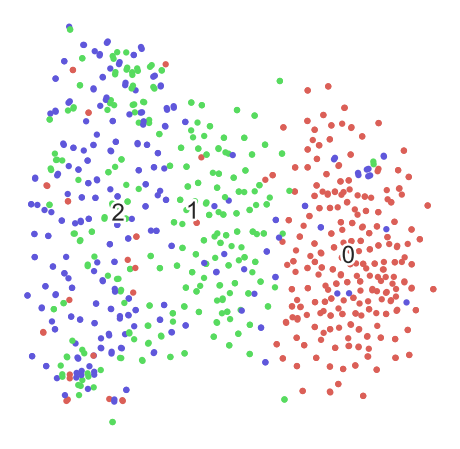

In [25]:
fashion_tsne = TSNE(random_state=RS, n_jobs=-1).fit_transform(Xtrain)

f, ax, sc, txts = fashion_scatter(fashion_tsne, Ytrain)
f.show()
f.savefig('./output/img_S6scatter152.svg')

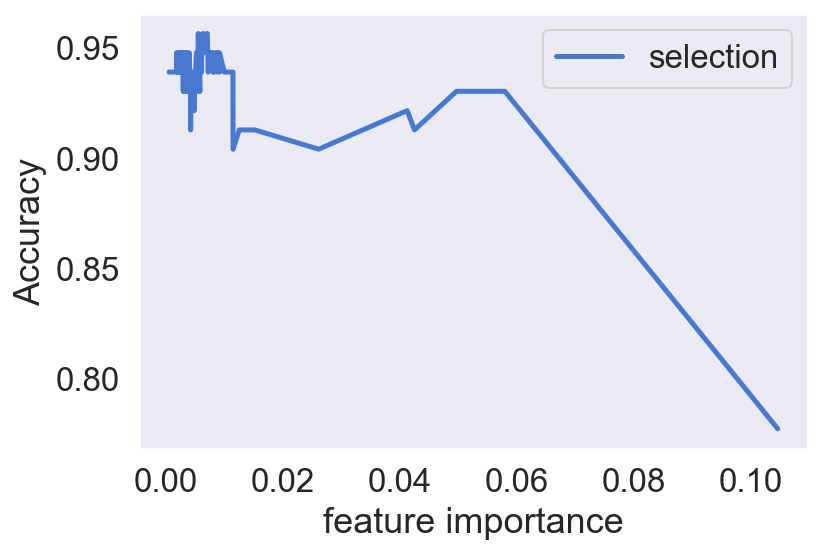

In [26]:
import matplotlib.pyplot as plt



plt.show()
plt.figure(figsize=(6,4), dpi=144)
plt.grid()
plt.xlabel("feature importance")
plt.ylabel("Accuracy")
plt.plot( thresholds,acc, label='selection')

plt.legend()

In [27]:
print(Ytest)
a=np.count_nonzero(Ytest == 1)#Neg
b=np.count_nonzero(Ytest == 2)#Pos
c=np.count_nonzero(Ytest == 0)#Neu
print(a)
print(b)
print(c)

67      0.0
225     1.0
1121    1.0
74      1.0
43      2.0
       ... 
501     1.0
31      1.0
873     1.0
1083    0.0
518     1.0
Name: Label, Length: 229, dtype: float64
80
62
87


In [28]:
#多分类：混淆矩阵

from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(Ytest,y_pred)
cfm_normalized = cfm.astype('float') / cfm.sum(axis=1)[:, np.newaxis]
print(cfm_normalized)
print(cfm)

[[0.87356322 0.08045977 0.04597701]
 [0.0625     0.7375     0.2       ]
 [0.06451613 0.24193548 0.69354839]]
[[76  7  4]
 [ 5 59 16]
 [ 4 15 43]]


In [29]:
import seaborn as sns

labels=["Neu","Neg","Pos"]
plt.figure(figsize=(6,4), dpi=144)
plt.xlabel("S6")
sns.heatmap(cfm_normalized,annot=True,cmap='Blues',xticklabels=labels,yticklabels= labels)
config InlineBackend.figure_format = 'svg'

SyntaxError: invalid syntax (<ipython-input-29-11843544185b>, line 7)

In [ ]:
import shap
import matplotlib.pyplot as pl


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xtrain)

shap.summary_plot(shap_values, Xtrain,color=pl.get_cmap("tab10"))
shap_values[1][:2,:]#表示前两个样本对于输出标签为1的shap值

In [ ]:
shap.summary_plot(shap_values[1],Xtest, plot_type="bar",color='green')
shap.summary_plot(shap_values[2],Xtest, plot_type="bar",color='orange')
shap.summary_plot(shap_values[0],Xtest, plot_type="bar",color='blue')

In [ ]:
# SHAP值解释
shap.summary_plot(shap_values[1], Xtrain, max_display=15)#消极情感

shap.summary_plot(shap_values[2], Xtrain, max_display=15)#积极情感
shap.summary_plot(shap_values[0], Xtrain, max_display=15)#中性情感

In [ ]:
# 单个特征'dangou_ratio'与模型预测结果的关系
shap.dependence_plot('std_3', shap_values[1],Xtrain[x.columns], display_features=Xtrain[x.columns],interaction_index=None)
shap.dependence_plot('std_0', shap_values[1],Xtrain[x.columns], display_features=Xtrain[x.columns],interaction_index='auto')

# ---------------------------分割线-----------------------------

# Embedded嵌入法

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

In [ ]:
RFC_ = RFC(n_estimators=10,random_state=0)  # 随机森林实例化

In [ ]:
x = data_.iloc[:,:-2]
y = data_.iloc[:,-1]
x.shape

* 阈值为0.005

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(x,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_

In [ ]:
x_embedded.shape
#模型的维度明显被降低了
#同样的，我们也可以画学习曲线来找最佳阈值

In [ ]:
RFC_.fit(x,y).feature_importances_

In [ ]:
(RFC_.fit(x,y).feature_importances_).max()

In [ ]:
# 绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
RFC_.fit(x,y).feature_importances_
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
#0 - feature_importances_ 范围中取20个数

score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y) # 随机森林实例化
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()  # 交叉验证5次
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [ ]:
threshold

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.00870999).fit_transform(x,y)

In [ ]:
x_embedded.shape

In [ ]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

In [ ]:
# 确定准确率最高threshold值


score2 = []
for i in np.linspace(0,0.00870999,20):
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y)
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()
    score2.append(once)
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00870999,20),score2)
plt.xticks(np.linspace(0,0.00870999,20))
plt.show()

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.003209).fit_transform(x,y)

In [ ]:
x_embedded.shape

In [ ]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

In [ ]:
cross_val_score(RFC(n_estimators=100,random_state=0),x_embedded,y,cv=5).mean()

* 阈值为0.001

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.001).fit_transform(x,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_

In [ ]:
x_embedded.shape

In [ ]:
RFC_.fit(x,y).feature_importances_

In [ ]:
(RFC_.fit(x,y).feature_importances_).max()

In [ ]:
# 绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
RFC_.fit(x,y).feature_importances_
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
#0 - feature_importances_ 范围中取20个数

score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y) # 随机森林实例化
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()  # 交叉验证5次
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [ ]:
threshold

# Wrapper包装法

In [ ]:
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators=10,random_state=0)
selector = RFE(RFC_,n_features_to_select=22,step=5).fit(x,y)  # 每迭代一次删除掉50个特征

In [ ]:
selector.support_.sum() #.support_：返回所有的特征的是否最后被选中的布尔矩阵

In [ ]:
selector.ranking_   #返回特征的按数次迭代中综合重要性的排名,越重要的特征排在前面

In [ ]:
x_wrapper = selector.transform(x)

In [ ]:
cross_val_score(RFC_,x_wrapper,y,cv=5).mean()

In [ ]:
# 绘制学习曲线
score = []
for i in range(1,751,50):
    x_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(x,y)
    once = cross_val_score(RFC_,x_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()